<a href="https://colab.research.google.com/github/egonik-unlp/Python/blob/master/entrega2_pefe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import scipy.stats as st
from IPython.display import Markdown as md
from IPython.display import display as d
from IPython.display import Latex as lt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import *
from sympy import *

#Segunda entrega de ejercicios PEFE

#### *Eduardo Gonik*

### Ejercicio 4.1


Suponga que dos medidas $x_1$ y $x_2$ tienen incerteza aleatorias individuales $\sigma_1$ y $\sigma_2$ y tienen
una incerteza sistemática común $S$. Esto se puede tratar considerando que $x_1$ esta compuesto
de dos partes $x^r_1$ con incerteza aleatoria y $x^s_1$ con incerteza sistemática $S$, de manera similar
para $x_2$. Con esta definición $x^r_1$ y $x^r_2$ son independiente entre ellos y con $x^s_1$ , $x^s_2$ , pero $x^s_1$ y $x^s_2$
están completamente correlacionadas. Mostrar que la matriz de covarianza queda:

$$V =\begin{pmatrix}
\sigma^2_1 + S^2 & S^2 \\
S^2 & \sigma^2_1 + S^2 
\end{pmatrix}$$


Partimos del siguiente planteo de la matriz de covarianza:

$$V =\begin{pmatrix}
cov (x_1,x_1) = V(x_1)& cov (x_2,x_1) \\
cov (x_1,x_2)  & cov (x_2,x_2) = V(x_2) 
\end{pmatrix}$$


La diagonal principal de la matriz de covarianza estarán poblados por la varianza de cada medida consigo misma, que se calcula de la siguiente manera:

$$ 
\begin{align}V(x_1) &= E\big[x^2_1\big] - E \big[x_1\big]^2 \\
 &= E\big[(x_1^R + x_1^S \big)^2] - E\big[(x_1^R + x_1^S \big)]^2 \\
  &= \sigma_1^2 + S^2
 \end{align} $$ 

 y de forma análoga para $x_2$

 $$V(x_2) = \sigma_2^2 + S^2 $$

Las varianzas cruzadas:

$$
\begin{align} cov(x_1,x_2) &=  E\big[x_1x_2\big] - E\big[x_1\big]E\big[x_2\big] \\
&= E\big[(x_1^R + x_1^S)(x_2^R + x_2^S)\big] - E\big[(x_1^R + x_1^S)\big] E\big[(x_2^R + x_2^S)\big]
\end{align}
$$

Como las incertezas $x^R_1$ y $x^R_2$ no tienen correlación con ninguna otra, los productos que las involucran se cancelan, quedando:
$$\begin{align}
cov(x_1,x_2) &= S^2 \\
cov(x_2,x_1) &= S^2
\end{align}
$$

Resultando la matriz de covarianza finalmente:


$$V =\begin{pmatrix}
\sigma^2_1 + S^2 & S^2 \\
S^2 & \sigma^2_1 + S^2 
\end{pmatrix}$$

---

### Ejercicio 4.3

Encuentre los estimadores de máxima verosimilitud conjuntos para la esperanza y la varianza
de una gaussiana y obtenga su matriz de covarianza asintótica a partir de las derivadas
segundas del logaritmo de la verosimilitud.



$$  f(x_i, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{\Large - \frac{1}{2} \big( \frac{x_i - \mu}{\sigma} \big)^{2}}
 $$

Planteamos la función de likelihood y luego aplicamos $\ln$

$$ \mathcal{L}(\underline{x}, \mu, \sigma) = \prod_{i = 1}^{n} \Bigg[\frac{1}{\sqrt{2\pi\sigma^{2}}} e^{\Large - \frac{1}{2} \big( \frac{x_i - \mu}{\sigma} \big)^{2}}\Bigg] $$

$$ 
\begin{align} \ln{\mathcal{L}(\underline{x}, \mu, \sigma)} &= \sum_{i = 1}^{n} \Bigg[\frac{1}{\sqrt{2\pi\sigma^{2}}} e^{\Large - \frac{1}{2} \big( \frac{x_i - \mu}{\sigma} \big)^{2}}\Bigg]\\ 
 &= \sum^{n}_{i=1} -\frac{1}{2} \ln{\sigma^{2}} -\ln{\sqrt{2 \pi}} - \frac{1}{2} \bigg ( \frac{x_i - \mu}{\sigma} \bigg )^{2} 
\end{align}
$$

Para poder hallar los estimadores $\hat{\mu}$ y $\hat{\sigma^2}$, ( $\underline{\hat\theta}) $  , derivamos log-likelihood con respecto a dichos parámetros e igualamos a 0.

$$
\frac{\partial \ln{\mathcal{L}}}{\partial \mu} \Bigg |_{\underline{\hat{\theta}}} = \sum_{i = 1}^n \frac{x_i - \hat{\mu}}{\sigma^2} = 0
$$

Quedando entonces el estimador de $\mu$:
$$\hat{\mu} = \bar{x} $$

y para $\sigma^2$:

$$
\begin{align}
\frac{\partial \ln{\mathcal{L}}}{\partial \sigma^2} \Bigg |_{\underline{\hat{\theta}}} &= -\frac{n}{2\hat{\sigma^2}} + \frac{1}{2} \sum_{i=1}^n \frac{ (x_i- \hat{\mu})^2}{(\hat{\sigma^2})^2} = 0\\
 \hat{\sigma^2} &= \sum_{i=1}^n \frac{(x_i-\hat{\mu})^2}{n} 
\end{align}
 $$

 La matriz de covarianza en este caso se pueded definir como:
 $$
 V_{ij}(\hat{\mu},\hat{\sigma^2})^{-1} = - \mathcal{H} 
 $$

 Entonces calculamos las segundas derivadas evaluadas en los estimadores :


$$ - \frac{\partial^2{\ln{\mathcal{L}}}}{\partial{\mu}\partial{\sigma^2}} \Bigg {|}_{\underline{\hat{\theta}}} = \frac{n}{2\hat{\sigma^4}} \Bigg{(} \sum_{i=1}^n  \frac{x_i - \hat{\mu}}{n} \Bigg{)}  = 0 $$

Como ambas segundas derivadas existen y son continuas, aplicando el teorema de Clairaut: 
$$- \frac{\partial^2{\ln{\mathcal{L}}}}{\partial{\sigma^2}\partial{\mu}} \Bigg {|}_{\underline{\hat{\theta}}}   = 0$$

Las derivadas dobles por los parámetros quedan:

$$ - \frac{\partial^2{\ln{\mathcal{L}}}}{\partial{\mu^2}} \Bigg {|}_{\underline{\hat{\theta}}} = \frac{n}{\hat{\sigma^2}}$$
y


$$ - \frac{\partial^2{\ln{ \mathcal{L}}}}{\partial({\sigma^2})^2} \Bigg {|}_{\underline{\hat{\theta}}} =  \frac{n}{2\hat{\sigma^4}} $$

Quedando entonces la matriz de covarianza:

$$
V_{ij}(\hat{\mu}, \hat{\sigma^2}) = \begin{pmatrix}
\displaystyle
 \frac{\hat{\sigma^2}}{n} & 
 \displaystyle0 \\
\displaystyle 0 & \displaystyle \frac{2\hat{\sigma^4}}{n}
\end{pmatrix} 
$$

---


### Ejercicio 5.1

Una nueva partı́cula del tipo charm es vista en un detector de emulsión expuesto a un haz de
neutrinos. Midiendo la energı́a de las partı́culas secundarias producidas por esta partı́cula, se
determina que para este particular evento, la partı́cula encantada vivió 3x10−13 segundos en
su sistema en reposo antes de decaer. ¿Cuáles son lo limites, a un nivel de confianza de 90 %
(simétrico), para la vida media de esta partı́cula ?




Suponemos que el decaimiento de la partícula *charm* se puede modelizar con una distribución exponencial con $\lambda = \frac{1}{\tau}$, siendo $\tau = 3 x 10^{-13} s $. Usamos entonces la expresión :

$$ f(t) = \lambda e^{-\lambda t} = \frac{1}{\tau} e^{\Large\frac{t}{\tau}} $$

Como buscamos definir intervalos de confianza simétrico con $\gamma = 0.10$, entonces $\alpha = \beta = \frac{\gamma}{2} $.

Teniendo en cuenta las definiciones de $\alpha$ y $\beta$:

$$
\begin{align}
\alpha = \int_{t}^{\infty} \lambda e^{-\lambda t} dt &= 1 - e^{\Large -\frac{t}{\tau}}  = 0.05 \\
\beta = \int_{-\infty}^{t} \lambda e^{-\lambda t} dt &= e^{\Large -\frac{t}{\tau}}  = 0.05
\end{align}
$$

Despejando $\tau$ de ambas ecuaciones el intervalo de confianza resulta:

$$
\displaystyle{ \bigg(\frac{t}{\ln{0.05}}, \frac{t}{\ln{0.95}} \bigg)}
$$

Finalmente:
$$
\bigg(1\ \textrm{x}\ 10^{-13} s,\ 5.85\ \textrm{x}\ 10^{-13} s \bigg)
$$

---

### Ejercicio 5.3

 El bosón W es una partı́cula elemental intermediaria de la fuerza débil descubierta en 1983.
Su masa ha sido medida por diversos experimentos, con distintos niveles de precisión. Los
datos de la edición 2000 del Review of Particle Physics son, en GeV:


In [82]:
medidas = {'DO':(80.482, 0.091), 'Aleph':(80.423,0.112), 'Opal':(80.38,0.12), 'L3':(80.61, 0.15), 'CDF': (80.41, 0.18)}
valor = 80.458
datos = pd.DataFrame(medidas, index = ['$\mu$ ', '$\sigma$']).T
datos.index.name = 'Experimento'
d(md(datos.to_markdown()))

| Experimento   |   $\mu$  |   $\sigma$ |
|:--------------|---------:|-----------:|
| DO            |   80.482 |      0.091 |
| Aleph         |   80.423 |      0.112 |
| Opal          |   80.38  |      0.12  |
| L3            |   80.61  |      0.15  |
| CDF           |   80.41  |      0.18  |

Muestre que el resultado combinado es 80.458 y analice la consistencia de los resultados con un
test. Para esto asuma que las mediciones con incertezas gaussianos y construya el estadı́stico:

$$S = \sum_i \bigg[ \frac{y_i - f(x_i)}{\sigma_i}\bigg]^2$$

cuya distribución es $\chi^2$ y calcule p-valor del resultado.


Si se desea estimar el valor de una cantidad física $x$ a partir de múltiples experimentos independientes $x_1, x_2, ... , x_n$ con errores $\delta_1,\delta_2, ... , \delta_n $ se puede emplear la media ponderada de dichas medidas como herramienta para reconciliar los datos.

Ésta se define de la siguiente manera:

$$\displaystyle x=  \frac{\sum_{i=1}^N \frac{x_i}{\delta_i^2}}{\sum_{i=1}^{N}\frac{1}{\delta_i^2}} $$

Para este fin, primero calculamos $\delta_i^2$ para nuestros datos


In [83]:
datos["$\delta^2$"] = datos["$\sigma$"].map(lambda x:x**2)
d(md(datos.to_markdown()))

| Experimento   |   $\mu$  |   $\sigma$ |   $\delta^2$ |
|:--------------|---------:|-----------:|-------------:|
| DO            |   80.482 |      0.091 |     0.008281 |
| Aleph         |   80.423 |      0.112 |     0.012544 |
| Opal          |   80.38  |      0.12  |     0.0144   |
| L3            |   80.61  |      0.15  |     0.0225   |
| CDF           |   80.41  |      0.18  |     0.0324   |

Luego realizamos el cálculo:

In [84]:
num = sum([mu/delta for mu, delta in zip(datos['$\mu$ '], datos['$\delta^2$'])])
den = sum([1/i for i in datos['$\delta^2$']])
d(md(f"El valor de la suma ponderada para estos datos experimentales es {num/den:0.3f}"))

El valor de la suma ponderada para estos datos experimentales es 80.458

Luego calculamos el valor del estadístico de prueba:

In [85]:
lista = [np.power((i[0] - valor )/i[1], 2) for i in medidas.values()] #Invertir
chi_observado = sum(lista)

Debido a que tenemos 5 medidas y buscamos determinar un parámetro con $k=4$ grados de libertad

In [86]:
chi2 = st.chi2(df = 4)

Luego evaluamos en el valor obtenido para $\chi_{obs}$ y determinamos el p-valor.

In [87]:
p_val = 1 - chi2.cdf(chi_observado)
d(md(f'El p-valor es {p_val:0.2f}, para un valor de 'r'$\chi_{obs}$='f' {chi_observado:0.2f}.'))

El p-valor es 0.79, para un valor de $\chi_{obs}$= 1.69.

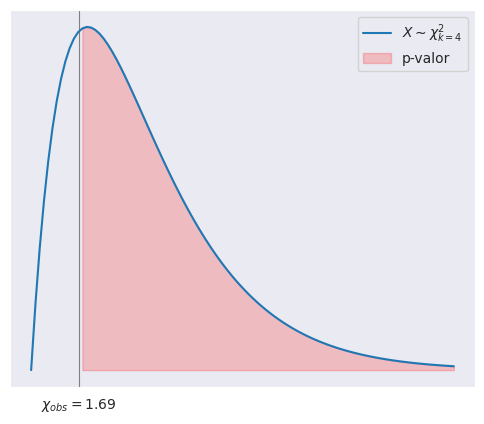

In [114]:
x = np.linspace(0,15,100)
plt.figure(figsize= (6,5), dpi = 100)
sns.set_style('darkgrid', {"grid.color": "grey"})
sns.lineplot(x = x, y = chi2.pdf(x), label = r'$X \sim \chi^2_{k = 4}$')
plt.fill_between(x[x >= chi_observado],chi2.pdf(x[x >= chi_observado]) ,color= 'red', alpha = 0.20, label = 'p-valor')
plt.yticks([])
plt.xticks([chi_observado],[r'$\chi_{obs} =$'f'{chi_observado:0.2f}'])

plt.legend()
plt.show()